### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*

    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [2]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df.shape # (2443651, 9)
df.head(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [ ]:
# Generate a frequency table for the product `category`.

frequencies = df['category'].value_counts()
frequency_df = df['category'].value_counts().reset_index()
frequency_df.columns = ['Category', 'Frequency']
print(frequency_df)

                                   Category  Frequency
0                         Sports & Outdoors     836265
1                                    Beauty      19312
2    Handmade Clothing, Shoes & Accessories      19229
3                               Bath & Body      19092
4                            Birthday Gifts      18978
..                                      ...        ...
291                       Motorbike Chassis        107
292                  Alexa Built-In Devices        107
293                                   Plugs        107
294          Smart Home Security & Lighting        104
295                          Smart Speakers         54

[296 rows x 2 columns]


In [6]:
# Which are the top 5 most listed product categories?

frequencies.head(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

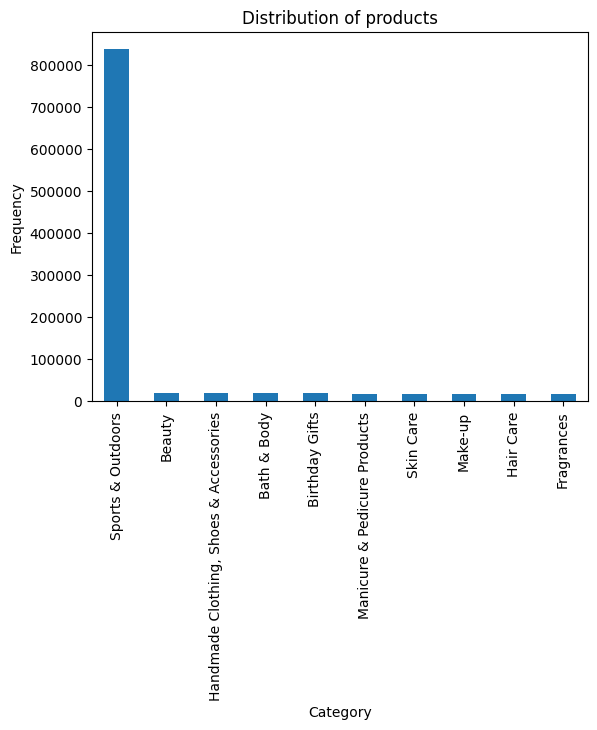

In [24]:
# Display the distribution of products across different categories using a bar chart. 
# *If you face problems understanding the chart, do it for a subset of top categories.*

frequency_df = df['category'].value_counts().head(10)
frequency_df.columns = ['Category', 'Frequency']


# Crear el gráfico de barras
frequency_df.plot(kind='bar')

# Añadir título y etiquetas
plt.title('Distribution of products')
plt.xlabel('Category')
plt.ylabel('Frequency')

# Mostrar el gráfico
plt.show()


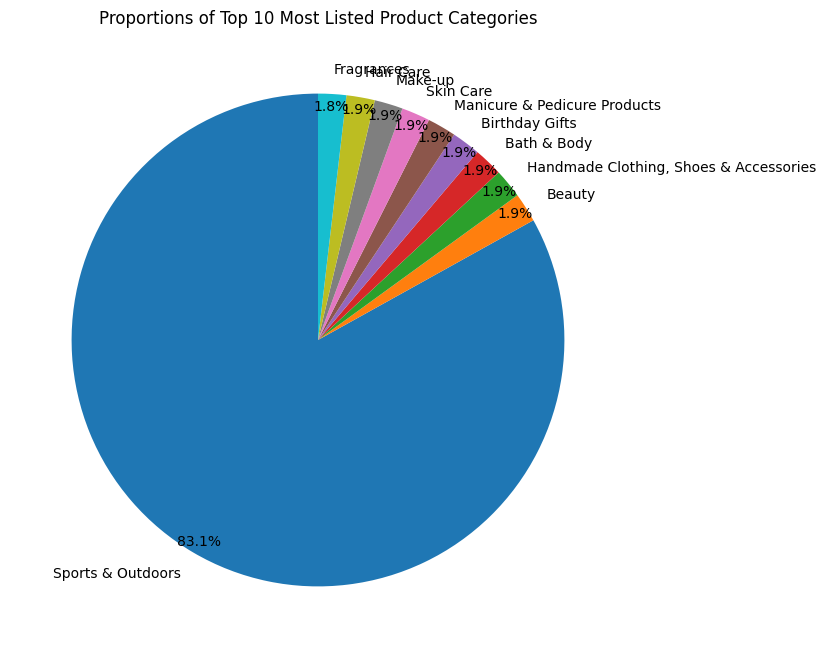

In [25]:
# For a subset of top categories, visualize their proportions using a pie chart. 

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(frequency_df, labels=frequency_df.index, autopct='%1.1f%%', startangle=90, pctdistance=0.95, labeldistance=1.1)

# Añadir un título
plt.title('Proportions of Top 10 Most Listed Product Categories')

# Asegúrate de que el gráfico de pastel sea un círculo
plt.gca().set_aspect('equal')

# Mostrar el gráfico
plt.show()

# Does any category dominate the listings?

# Yes, sports and Outdoors

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

In [ ]:
# Calculate the mean, median, and mode for the `price` of products.

# Mean
mean_price = df['price'].mean()

# Median
median_price = df['price'].median()

# Mode
mode_price = df['price'].mode()[0]

print(f"Mean: {mean_price}")
print(f"Median: {median_price}")
print(f"Mode: {mode_price}")

# What's the average price point of products listed? 
# 89.24
# How does this compare with the most common price point (mode)?
# The mean is up to 10 times bigger than the mode.

Mean: 89.24380943923663
Median: 19.09
Mode: 9.99


In [39]:
prices_df = df['price'].value_counts()
prices_df.tail(10)

price
437.01    1
261.15    1
503.78    1
387.18    1
521.64    1
516.81    1
427.90    1
494.74    1
528.07    1
370.37    1
Name: count, dtype: int64

In [35]:
# Determine the variance, standard deviation, range, and interquartile range for product `price`.

# Variance
variance_price = df['price'].var()

# Standard deviation
std_dev_price = df['price'].std()

# Range
range_price = df['price'].max() - df['price'].min()

# Interquartile range

q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr_price = q3 - q1

print(f"Variance: {variance_price}")
print(f"Standard Deviation: {std_dev_price}")
print(f"Range: {range_price}")
print(f"Interquartile Range (IQR): {iqr_price}")

# How varied are the product prices? Are there any indicators of a significant spread in prices?

# The standard deviation is high, such as the range and the IQR, so the product prices are very varied.



Variance: 119445.48532254907
Standard Deviation: 345.60886175349884
Range: 100000.0
Interquartile Range (IQR): 36.0


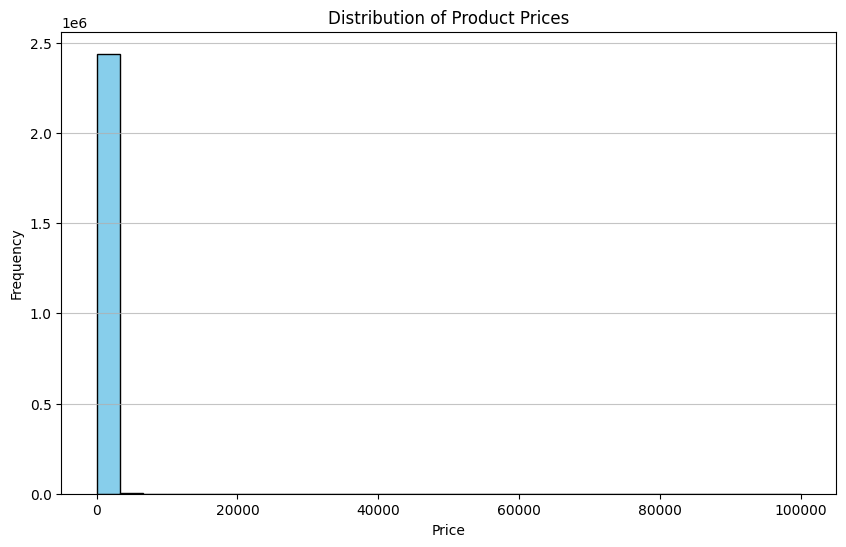

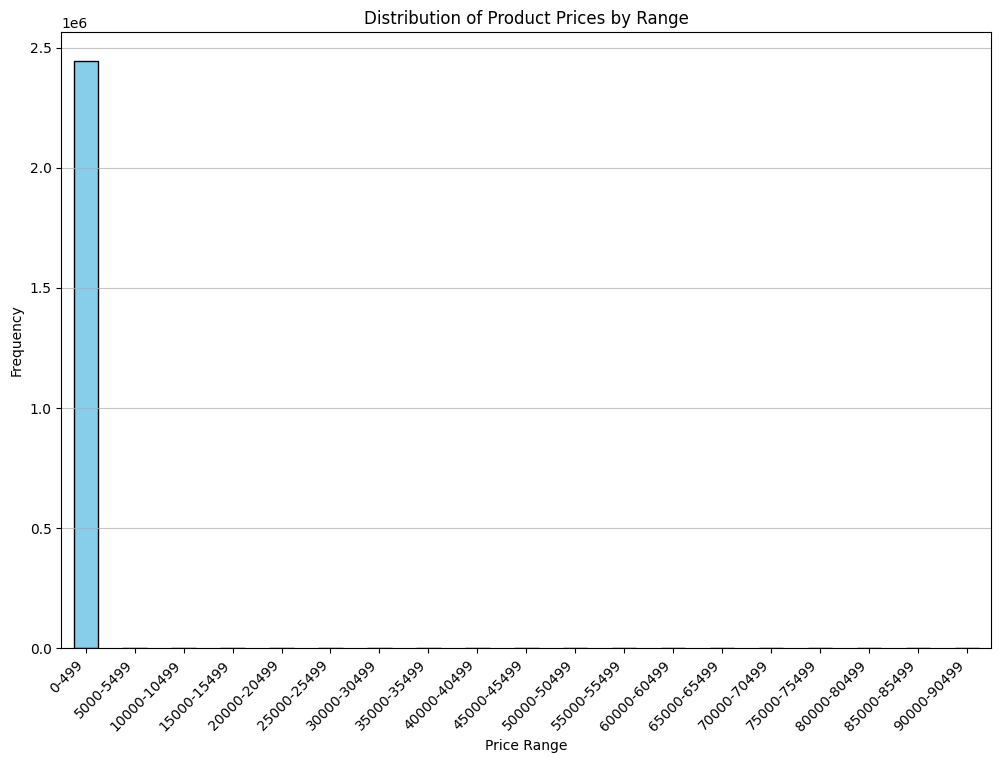

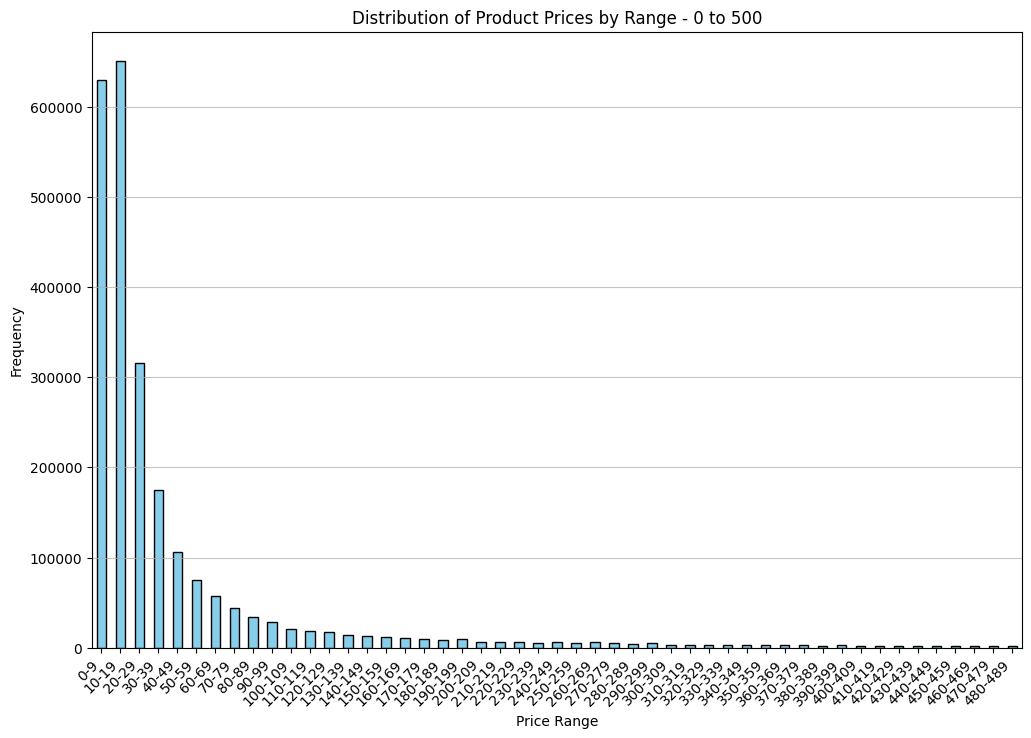

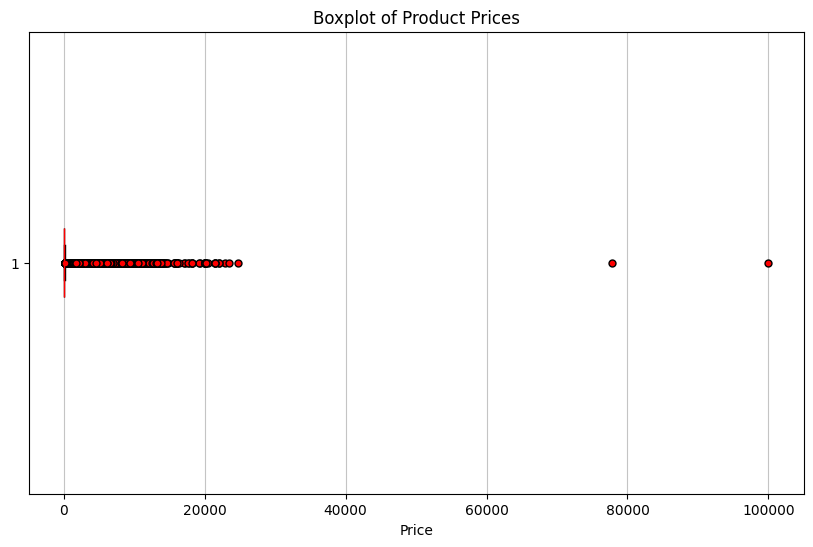

In [ ]:
#  Is there a specific price range where most products fall? 
# Plot a histogram to visualize the distribution of product prices.
# *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.

plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Show graph
plt.show()

# It is hard to see because there are too many data. One way to solve it is to group them into bins:

bins = range(0, 100000, 5000)

# Creación de etiquetas para los bins
labels = [f'{b}-{b+499}' for b in bins[:-1]]

# Categorizar los precios en rangos usando pd.cut()
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# Contar las frecuencias en cada rango
price_range_counts = df['price_range'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(12, 8))
price_range_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Product Prices by Range')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)

# Mostrar el gráfico
plt.show()

# Now with focused data:

bins = range(0, 500, 10)

# Creación de etiquetas para los bins
labels = [f'{b}-{b+9}' for b in bins[:-1]]

# Categorizar los precios en rangos usando pd.cut()
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# Contar las frecuencias en cada rango
price_range_counts = df['price_range'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(12, 8))
price_range_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Product Prices by Range - 0 to 500')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)

# Mostrar el gráfico
plt.show()

# Are there products that are priced significantly higher than the rest? 
# Use a box plot to showcase the spread and potential outliers in product pricing. 

plt.figure(figsize=(10, 6))
plt.boxplot(df['price'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='black'), 
            whiskerprops=dict(color='black'), capprops=dict(color='black'), 
            medianprops=dict(color='red'), flierprops=dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none'))

plt.title('Boxplot of Product Prices')
plt.xlabel('Price')
plt.grid(axis='x', alpha=0.75)

# Mostrar el gráfico
plt.show()

# Yes, there are several products with prices significantly higher than the rest.

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?



In [ ]:
# Calculate the mean, median, and mode for the `rating` of products.

# Mean
mean_rating = df['stars'].mean()

# Median
median_rating = df['stars'].median()

# Mode
mode_rating = df['stars'].mode()[0]

print(f"Mean: {mean_rating}")
print(f"Median: {median_rating}")
print(f"Mode: {mode_rating}")

# How do customers generally rate products? Is there a common trend?

# They generally give bad rating, lower than 3 out of 5. 
# Also, the Median is 0, which means that up to 50% of the products have 0 stars.


Mean: 2.152836472966065
Median: 0.0
Mode: 0.0


In [ ]:
# Determine the variance, standard deviation, and interquartile range for product `rating`.
# Are the ratings consistent, or is there a wide variation in customer feedback?

# Variance
variance_rating = df['stars'].var()

# Standard deviation
std_dev_rating = df['stars'].std()

# Range
range_rating = df['stars'].max() - df['stars'].min()

# Interquartile range

q1 = df['stars'].quantile(0.25)
q3 = df['stars'].quantile(0.75)
iqr_rating = q3 - q1

print(f"Variance: {variance_rating}")
print(f"Standard Deviation: {std_dev_rating}")
print(f"Range: {range_rating}")
print(f"Interquartile Range (IQR): {iqr_rating}")

# The ratings are consistent.

Variance: 4.817434029796862
Standard Deviation: 2.1948653785134207
Range: 5.0
Interquartile Range (IQR): 4.4


In [51]:
# Calculate the skewness and kurtosis for the `rating` column. 
# Are the ratings normally distributed, or do they lean towards higher or lower values?

# Calcular la asimetría
rating_skewness = skew(df['stars'].dropna())

# Calcular la curtosis
rating_kurtosis = kurtosis(df['stars'].dropna(), fisher=True)  # fisher=True ajusta la curtosis a 0 para una normal

# Imprimir los resultados
print(f"Skewness of ratings: {rating_skewness}")
print(f"Kurtosis of ratings: {rating_kurtosis}")

# Análisis
if rating_skewness > 0:
    skew_message = "The ratings are skewed to the right (positive skewness), indicating a tendency toward lower values."
elif rating_skewness < 0:
    skew_message = "The ratings are skewed to the left (negative skewness), indicating a tendency toward higher values."
else:
    skew_message = "The ratings are symmetrically distributed."

if rating_kurtosis > 3:
    kurtosis_message = "The ratings have heavy tails and a sharp peak (leptokurtic)."
elif rating_kurtosis < 3:
    kurtosis_message = "The ratings have lighter tails and a flatter peak (platykurtic)."
else:
    kurtosis_message = "The ratings have normal kurtosis (mesokurtic)."

print(skew_message)
print(kurtosis_message)

NameError: name 'skew' is not defined

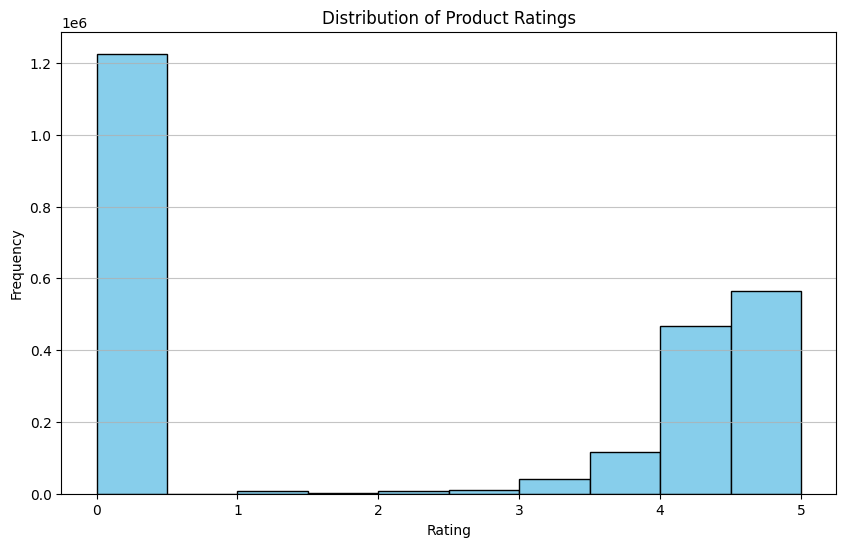

In [ ]:
# Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

plt.figure(figsize=(10, 6))
plt.hist(df['stars'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Show graph
plt.show()

# As showed previously by the mode, the 0 rating is the most common.
